# 1. Generate data (you can generate your own data)

In [1]:
from sklearn import datasets
import numpy as np

c = np.array([[3, 4], [6, 5]])
X, y = datasets.make_blobs(n_samples=20,n_features=2,
                           centers=c, cluster_std=1.3,
                           random_state=727)

In [2]:
with open("log_reg_data.txt", "w") as f:
    f.write("x1\tx2\tlabel\n")
    for i in range(len(X)):
        f.write(f'{X[i][0]:.2f}' + '\t' + f'{X[i][1]:.2f}' + '\t' + f'{y[i]}' +'\n')

# 2. Load a dataset

In [3]:
import pandas as pd
df = pd.read_csv("log_reg_data.txt", sep='\t') 
df.head()

,x1,x2,label
0,8.49,3.28,1
1,5.21,4.42,1
2,5.47,4.19,1
3,4.12,3.51,0
4,2.44,1.86,0


In [20]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values
print(X_train)
print(y_train)

[[8.49 3.28]
 [5.21 4.42]
 [5.47 4.19]
 [4.12 3.51]
 [2.44 1.86]
 [3.67 4.95]
 [0.29 4.  ]
 [2.04 2.45]
 [7.13 3.13]
 [2.75 4.27]
 [1.21 2.49]
 [6.85 4.56]
 [3.63 2.99]
 [5.32 5.84]
 [4.76 3.96]
 [1.72 4.47]
 [5.32 7.69]
 [2.06 4.26]
 [4.76 6.42]
 [3.93 6.89]]
[1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0]


# 3. Plot the data

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_data(X_train):
    plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], '^', label="Class 0")
    plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'o', label="Class 1")
    plt.ylim(-10,10)
    plt.xlim(-10,10)
    plt.xlabel("Feature $x_1$")
    plt.ylabel("Feature $x_2$")
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

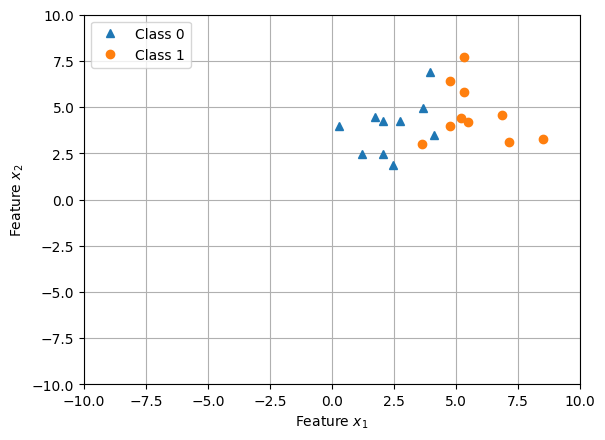

In [6]:
plot_data(X_train)

# 4. Normalize the data

In [7]:
X_train.mean(axis=0)

array([4.0585, 4.2815])

In [8]:
X_train.std(axis=0)

array([2.06020697, 1.46994311])

In [9]:
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

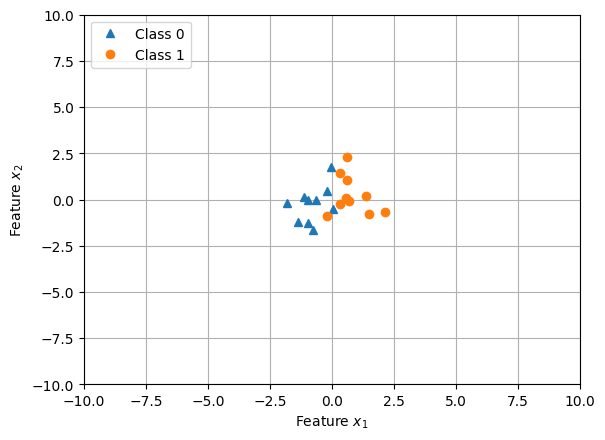

In [10]:
plot_data(X_train)

# 5. Implementing Logistic Regression

In [11]:
import torch

class LogisticRegression(torch.nn.Module):
    
    def __init__(self, num_features):
        super().__init__()
        self.linear = torch.nn.Linear(num_features, 1)
    
    def forward(self, x):
        logits = self.linear(x)
        probabilities = torch.sigmoid(logits)
        return probabilities

In [12]:
torch.manual_seed(123)

model = LogisticRegression(num_features=2)

In [13]:
x = torch.tensor([1.1, 2.2])

with torch.inference_mode():
    probs = model(x)
    
print(probs)

tensor([0.3505])


# 6. Defining a Dataloader

In [14]:
from torch.utils.data import Dataset, DataLoader


class MyDataset(Dataset):
    def __init__(self, X, y):
        self.features = torch.tensor(X, dtype=torch.float32)
        self.labels = torch.tensor(y, dtype=torch.float32)

    def __getitem__(self, index):
        x = self.features[index]
        y = self.labels[index]        
        return x, y

    def __len__(self):
        return self.labels.shape[0]
    

train_data_set = MyDataset(X_train, y_train)

train_loader = DataLoader(
    dataset=train_data_set,
    batch_size=4,
    shuffle=True,
)

# 7. Training loop

In [15]:
import torch.nn.functional as F

torch.manual_seed(123)
model = LogisticRegression(num_features=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

num_epochs = 20

for epoch in range(num_epochs):
    
    model = model.train()
    for batch_idx, (features, class_labels) in enumerate(train_loader):

        probabilities = model(features)
        
        loss = F.binary_cross_entropy(probabilities, class_labels.view(probabilities.shape))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        ### Print current state
        print(f'Epoch: {epoch+1:03d}/{num_epochs:03d}'
               f' | Batch {batch_idx+1:03d}/{len(train_loader):03d}'
               f' | Loss: {loss:.2f}')

Epoch: 001/020 | Batch 001/005 | Loss: 0.80
Epoch: 001/020 | Batch 002/005 | Loss: 0.86
Epoch: 001/020 | Batch 003/005 | Loss: 0.83
Epoch: 001/020 | Batch 004/005 | Loss: 0.76
Epoch: 001/020 | Batch 005/005 | Loss: 0.79
Epoch: 002/020 | Batch 001/005 | Loss: 0.73
Epoch: 002/020 | Batch 002/005 | Loss: 0.73
Epoch: 002/020 | Batch 003/005 | Loss: 0.81
Epoch: 002/020 | Batch 004/005 | Loss: 0.66
Epoch: 002/020 | Batch 005/005 | Loss: 0.83
Epoch: 003/020 | Batch 001/005 | Loss: 0.65
Epoch: 003/020 | Batch 002/005 | Loss: 0.89
Epoch: 003/020 | Batch 003/005 | Loss: 0.68
Epoch: 003/020 | Batch 004/005 | Loss: 0.74
Epoch: 003/020 | Batch 005/005 | Loss: 0.59
Epoch: 004/020 | Batch 001/005 | Loss: 0.67
Epoch: 004/020 | Batch 002/005 | Loss: 0.68
Epoch: 004/020 | Batch 003/005 | Loss: 0.63
Epoch: 004/020 | Batch 004/005 | Loss: 0.69
Epoch: 004/020 | Batch 005/005 | Loss: 0.65
Epoch: 005/020 | Batch 001/005 | Loss: 0.70
Epoch: 005/020 | Batch 002/005 | Loss: 0.57
Epoch: 005/020 | Batch 003/005 |

# 8. Decision boundary

In [16]:
import time
import pylab as pl
from IPython import display

def f(x, w1, w2, b):
    return (-b - (w1 * x) ) / w2

In [17]:
def plot_image(X, y, w1, w2, b):
    pl.clf()
    ax = fig.add_subplot()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    pl.plot(X[:, 0][y == 0], X[:,1][y==0], '^')
    pl.plot(X[:, 0][y == 1], X[:,1][y==1], 'o')
    ax.set_xlabel("feature 1")
    ax.set_ylabel("feature 2")
    ax.set_title(f'Epoch {epoch}, Iteration {i}')
    if w2:
        pl.axline((1, f(1, w1, w2, b)), (2, f(2, w1, w2, b)), color='k', ls='--')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #time.sleep(0.2)    

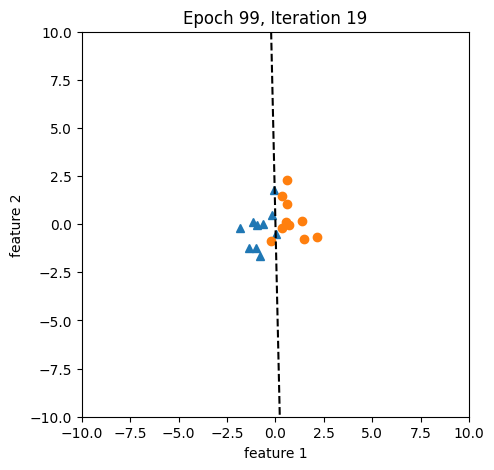

Epoch: 100/100 | Batch 005/005 | Loss: 0.16


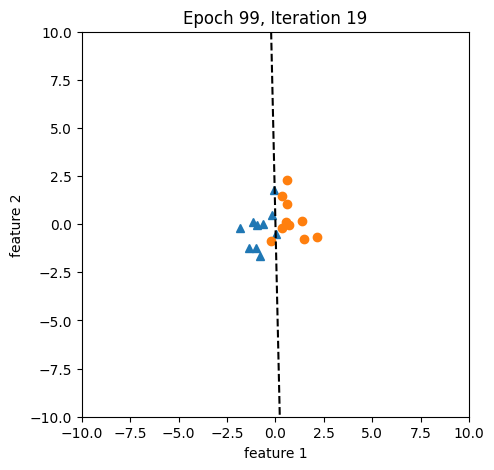

In [18]:
import torch.nn.functional as F

torch.manual_seed(123)
model = LogisticRegression(num_features=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

num_epochs = 100


fig = plt.figure(figsize=(5,5))

for epoch in range(num_epochs):
    
    model = model.train()
    for batch_idx, (features, class_labels) in enumerate(train_loader):

        probabilities = model(features)
        
        loss = F.binary_cross_entropy(probabilities, class_labels.view(probabilities.shape))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        plot_image(X_train, y_train, model.linear.weight[0][0].item(), model.linear.weight[0][1].item(), 
           model.linear.bias.item()) 


        ### Print current state
        print(f'Epoch: {epoch+1:03d}/{num_epochs:03d}'
               f' | Batch {batch_idx+1:03d}/{len(train_loader):03d}'
               f' | Loss: {loss:.2f}')
